## ML Algorithms, Part 6, Decision Trees

Decision Trees work use a tree or graph structure. Consider it like this: You repeatedly ask questions (these are the "brances", or nodes) and depending on the answers you split the dataset into smaller groups until these groups are small enough. For example, it will ask "Have you had any pain recently?", and then split the dataset into those that answer "yes" and those that answered "no". Then it asks another question, say, "Do you smoke?", and again splits the data, until it reaches a stopping criterion, e.g. that the last category (also called a "leaf") should have up to 4 data points. Then, you make predictions by following answering these questions for new data points.

Here are some more traditional trees, and later we will visualize a tree that we trained ourselves.

In [1]:
%%html

<h3>Two Decision Trees, by Wikipedia</h3>
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ad/Decision-Tree-Elements.png">
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/48/DecisionCalcs.jpg"> 

#### Imports

In [2]:
from sklearn.tree import DecisionTreeClassifier # there is also a Regressor class
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
br_cancer = load_breast_cancer()

In [4]:
print(br_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
X = br_cancer.data
Y = br_cancer.target

df = pd.DataFrame(np.concatenate([X, Y.reshape((-1,1))],axis=1), columns=np.concatenate([br_cancer.feature_names,["Class"]]))

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


When having a lot of rows and columns, one quick way to explore the data is using the `describe` method. It gives us summary statistics per variable.

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


We cannot visualize all 30 columns, but let's select 5 of these, plus the Class:

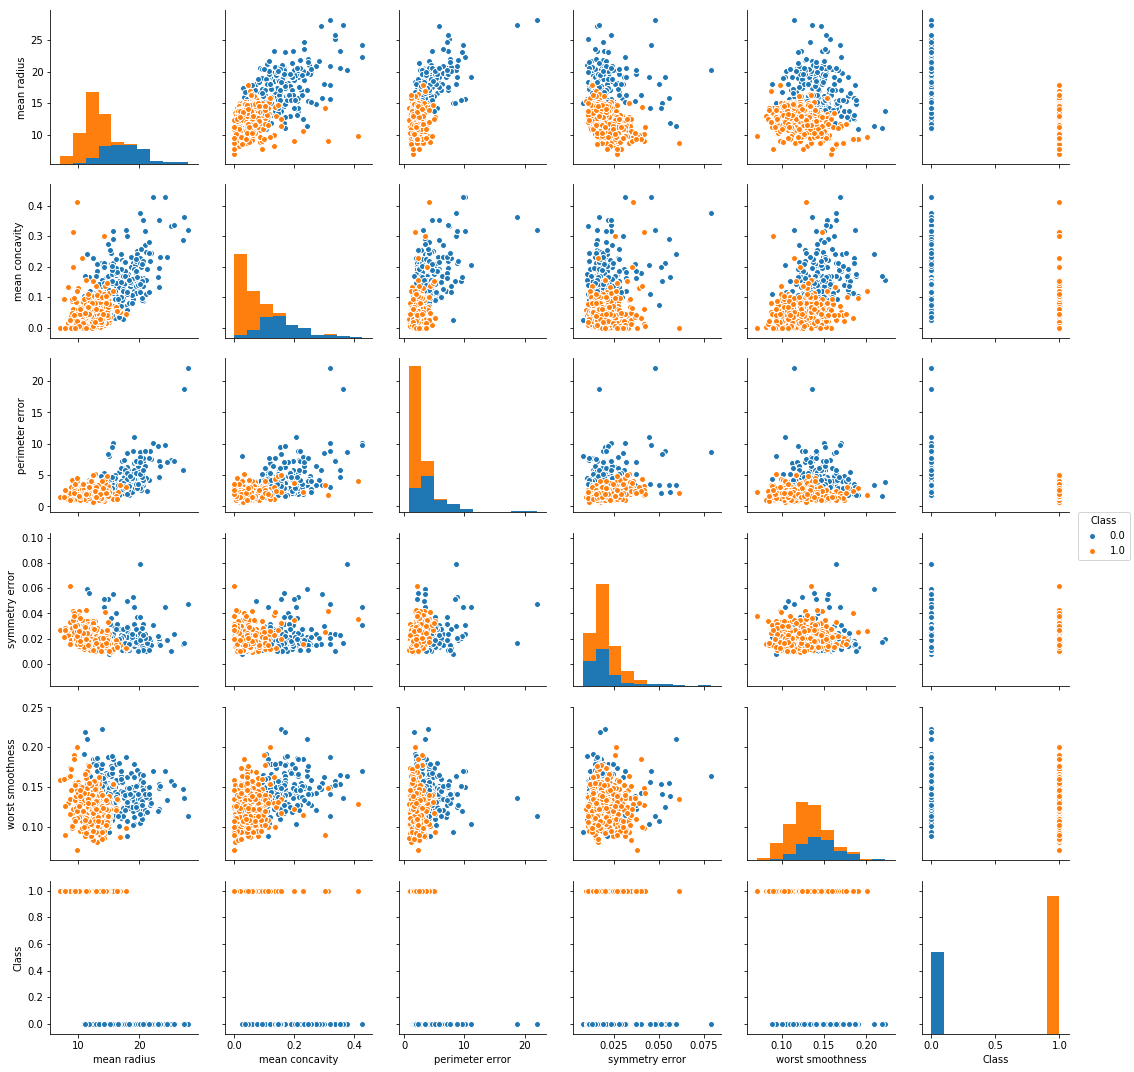

In [8]:
sns.pairplot(df[df.columns[0:32:6]], hue='Class')

As we can see, there is (mostly) clear separation between the classes. If you plot other variables you might see a better separation, but we leave that to as an exercise. Let's move to modelling.

#### Model definition and fitting

For convenience, we will just use these 5 variables, but accuracy will be better with more variables, which we would certainly use if this were a real case. We also specify `max_depth=3` and `min_samples_leaf=10` which are both very strict constaints, but it was done for visualization purposes later on (to have a small and clearly legible tree).

In [9]:
df.columns[0:30:6]

Index(['mean radius', 'mean concavity', 'perimeter error', 'symmetry error',
       'worst smoothness'],
      dtype='object')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X[:,0:30:6], Y)

In [11]:
dtc =  DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
print("Training accuracy: {:.2f}%".format(dtc.score(x_train, y_train)*100))

Training accuracy: 94.60%


In [13]:
print("Testing accuracy: {:.2f}%".format(dtc.score(x_test, y_test)*100))

Testing accuracy: 93.01%


There is obviously some overfitting, but with ~91% accuracy on the test set we're pretty content. This is an algorithm that depends on chance so, before visualizing the tree, let's run it 1000 times and see the different test accuracies:

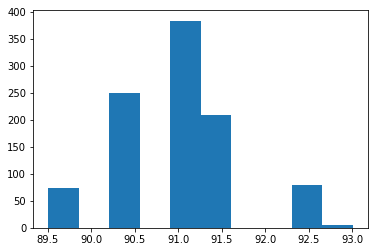

In [14]:
test_accs = []
for _ in range(1000):
    dtc_val =  DecisionTreeClassifier()
    dtc_val.fit(x_train, y_train)
    test_accs.append(dtc_val.score(x_test, y_test)*100)
    
plt.hist(test_accs);

Pretty much the same results across all iterations, all within a ±2% margin from 91.5%. Now that we took care of that, let's visualize this tree:

In [15]:
import graphviz
from sklearn.tree import export_graphviz

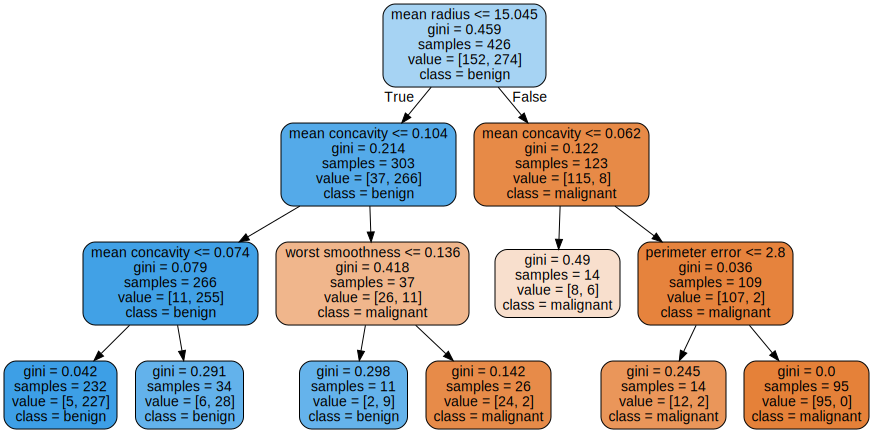

In [16]:
graphviz.Source(export_graphviz(dtc, out_file=None, feature_names=df.columns[0:30:6],
                                class_names=br_cancer.target_names, filled=True, rounded=True))

As we can see from above, the first split occurs by dividing the sample in groups according to whether they have a radius bigger or smaller than the mean radius. The second level is divided based on mean concavity, but there for the third level we  can see that different groups are split with different criteria. The color denotes the class, and [by looking at the source code](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/export.py#L360) its intensity denotes the node's impurity.

It is exactly visualizations like these that make trees attractive even though their accuracy is not the best. Finally, let's use the whole dataset to check accuracy (using multiple trees).

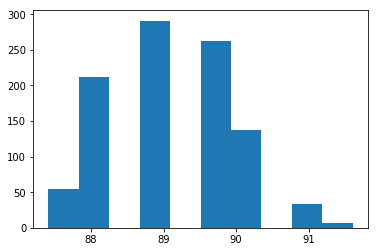

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y) # use all variables

test_accs = []
for _ in range(1000):
    dtc_val =  DecisionTreeClassifier()
    dtc_val.fit(x_train, y_train)
    test_accs.append(dtc_val.score(x_test, y_test)*100)
    
plt.hist(test_accs);

As expected, there is not much change in terms of accuracies (we did go a bit lower), we get roughly a mean of 89.5% with a ±3% range. 

Many Trees make a Forest, and next we will focus on Random Forests, a technique that uses multiple decision trees to create a more robust model.